In [169]:
###Kaggle APT Matches
#https://www.kaggle.com/sijovm/atpdata

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [193]:
df =pd.read_csv('atpdata/ATP.csv')

In [187]:
#df.info()

In [173]:
#df.describe()

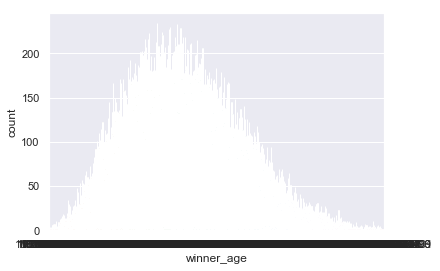

In [174]:
sns.set(style="darkgrid")
ax = sns.countplot(x="winner_age", data=df)

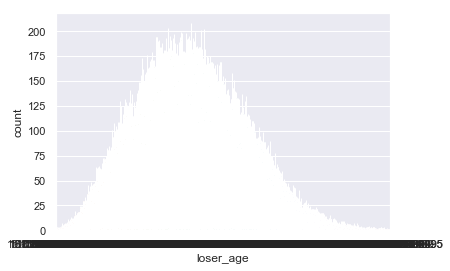

In [175]:
sns.set(style="darkgrid")
ax = sns.countplot(x="loser_age", data=df)

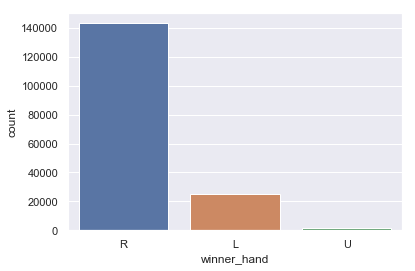

In [176]:
sns.set(style="darkgrid")
ax = sns.countplot(x="winner_hand", data=df)

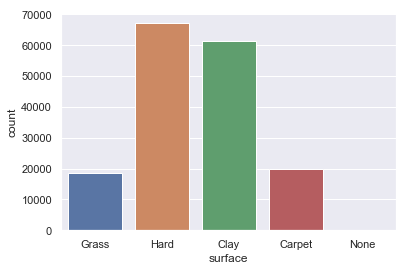

In [177]:
sns.set(style="darkgrid")
ax = sns.countplot(x="surface", data=df)

In [194]:
#split dataframe in half to create the target where player 1 wins
#in df1, player 1 = loser so target = 0
#in df2, plaer 1, = winner (because we switch them) so target = 1
df1 = df.loc[:84844,:]
df2 = df.loc[84845:,:]
df2.rename(columns={"l_1stIn" : "w_1stIn", 
                    "l_1stWon" : "w_1stWon",
                    "l_2ndWon" : "w_2ndWon",
                    "l_SvGms" : "w_SvGms",
                    "l_ace" : "w_ace",
                    "l_bpFaced" : "w_bpFaced",
                    "l_bpSaved" : "w_bpSaved",
                    "l_df" : "w_df",
                    "l_svpt" : "w_svpt",
                    "loser_age" : "winner_age",
                    "loser_entry" : "winner_entry",
                    "loser_hand" : "winner_hand",
                    "loser_ht" : "winner_ht",
                    "loser_id" : "winner_id",
                    "loser_ioc" : "winner_ioc",
                    "loser_rank" : "winner_rank",
                    "loser_rank_points" : "winner_rank_points",
                    "loser_seed" : "winner_seed",
                    "w_1stIn" : "l_1stIn", 
                    "w_1stWon" : "l_1stWon",
                    "w_2ndWon" : "l_2ndWon",
                    "w_SvGms" : "l_SvGms",
                    "w_ace" : "l_ace",
                    "w_bpFaced" : "l_bpFaced",
                    "w_bpSaved" : "l_bpSaved",
                    "w_df" : "l_df",
                    "w_svpt" : "l_svpt",
                    "winner_age" : "loser_age",
                    "winner_entry" : "loser_entry",
                    "winner_hand" : "loser_hand",
                    "winner_ht" : "loser_ht",
                    "winner_id" : "loser_id",
                    "winner_ioc" : "loser_ioc",
                    "winner_rank" : "loser_rank",
                    "winner_rank_points" : "loser_rank_points",
                    "winner_seed" : "loser_seed",
                   }, inplace=True)

df1['target'] = 0
df2['target'] = 1

df = df1.append(df2, sort=True)

c:\users\natacha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\natacha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [195]:
df['target'].value_counts()

1    84845
0    84845
Name: target, dtype: int64

In [196]:
#columns to drop : tourney_name - duplicate of Tourney_id, draw_size - not enought data 1K
columnsToDrop = ["tourney_id", "tourney_name", "draw_size", "score", "winner_name", "loser_name"]

df.drop(columnsToDrop, axis=1, inplace=True)

#columns to drop because limited RAM on computer
columnsToDropRam = ["winner_seed", "loser_seed", "loser_ioc", "winner_ioc", "loser_entry", "winner_entry" ]

df.drop(columnsToDropRam, axis=1, inplace=True)


#Replace missing values

#replace value with mean value
columns_mean = ["l_1stIn", "w_1stIn", "l_1stWon", "w_1stWon", "l_2ndWon", "w_2ndWon", 
                "l_SvGms", "w_SvGms", "l_bpSaved", "w_bpSaved", "l_bpFaced", "w_bpFaced", "l_ace", 
                "w_ace", "l_df", "w_df", "l_svpt", "w_svpt", "loser_age", "winner_age", "loser_ht", 
                "winner_ht", "loser_rank", "winner_rank", "loser_rank_points", "winner_rank_points", "minutes"]

for column in columns_mean:
    df[column] = df[column].fillna(np.mean(df[column]))

#replace empty entry, hand
#df["loser_entry"] = df["loser_entry"].fillna("no_entry")
#df["winner_entry"] = df["winner_entry"].fillna("no_entry")
df["loser_hand"] = df["loser_hand"].fillna("L")
df["winner_hand"] = df["winner_hand"].fillna("L")
df["surface"] = df["surface"].fillna("NA")


#split tourney_id

#change becaus enot enough Ram on computer
'''
columns_dummies = ["loser_entry", "winner_entry", "loser_hand", "winner_hand", "loser_ioc", "winner_ioc",
                   "round", "surface", "tourney_level" ]
'''

columns_dummies = ["loser_hand", "winner_hand",
                   "round", "surface", "tourney_level" ]

#convert object columns to numerical
le = preprocessing.LabelEncoder()

for column in columns_dummies:
    le.fit(df[column])
    df[column] = le.transform(df[column])

# columns to one hot encode : 
df = pd.get_dummies(df, columns=columns_dummies, drop_first=True)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169690 entries, 0 to 169689
Data columns (total 54 columns):
best_of               169690 non-null int64
l_1stIn               169690 non-null float64
l_1stWon              169690 non-null float64
l_2ndWon              169690 non-null float64
l_SvGms               169690 non-null float64
l_ace                 169690 non-null float64
l_bpFaced             169690 non-null float64
l_bpSaved             169690 non-null float64
l_df                  169690 non-null float64
l_svpt                169690 non-null float64
loser_age             169690 non-null float64
loser_ht              169690 non-null float64
loser_id              169690 non-null int64
loser_rank            169690 non-null float64
loser_rank_points     169690 non-null float64
match_num             169690 non-null int64
minutes               169690 non-null float64
target                169690 non-null int64
tourney_date          169690 non-null int64
w_1stIn               169

In [55]:
for column in df.columns:
    print('column name ', column, ' : ', df[column].value_counts() )

column name  best_of  :  3    131843
5     37847
Name: best_of, dtype: int64
column name  draw_size  :  64.0     378
128.0    357
96.0     191
4.0      177
32.0      93
16.0      29
8.0        7
Name: draw_size, dtype: int64
column name  l_1stIn  :  47.705149     86275
36.000000      2186
35.000000      2179
34.000000      2137
38.000000      2128
39.000000      2054
40.000000      2052
37.000000      2031
33.000000      2009
41.000000      1995
32.000000      1928
31.000000      1889
43.000000      1864
42.000000      1861
44.000000      1856
45.000000      1800
30.000000      1788
47.000000      1778
46.000000      1762
49.000000      1695
48.000000      1681
29.000000      1644
28.000000      1613
51.000000      1569
50.000000      1542
52.000000      1488
53.000000      1383
54.000000      1376
27.000000      1363
55.000000      1354
              ...  
140.000000        5
138.000000        5
136.000000        4
159.000000        4
139.000000        3
147.000000        3
145.000000

column name  loser_rank_points  :  1.0        327
2.0        206
785.0      156
3.0        155
770.0      154
575.0      153
5.0        153
685.0      152
790.0      149
4.0        148
950.0      148
715.0      145
540.0      143
825.0      142
520.0      141
920.0      141
740.0      139
710.0      139
545.0      138
730.0      137
580.0      137
475.0      137
900.0      136
515.0      136
760.0      135
615.0      134
585.0      133
880.0      132
860.0      132
6.0        130
          ... 
2736.0       1
2856.0       1
4445.0       1
3028.0       1
1971.0       1
5652.0       1
3597.0       1
2621.0       1
2623.0       1
3162.0       1
6380.0       1
3179.0       1
3216.0       1
2236.0       1
2504.0       1
3251.0       1
3365.0       1
6015.0       1
5255.0       1
5640.0       1
5258.0       1
2916.0       1
6130.0       1
3527.0       1
5265.0       1
10700.0      1
8895.0       1
1998.0       1
6495.0       1
4260.0       1
Name: loser_rank_points, Length: 3777, dtype: int6

column name  tourney_name  :  Wimbledon                       6477
Roland Garros                   6413
US Open                         6298
Australian Open                 5255
Barcelona                       2929
Miami Masters                   2755
Queen's Club                    2594
Washington                      2535
Indian Wells Masters            2226
Indianapolis                    2123
Kitzbuhel                       2002
Los Angeles                     1743
Rome Masters                    1731
Memphis                         1686
Stockholm                       1682
Monte Carlo Masters             1659
Cincinnati Masters              1651
Canada Masters                  1643
Hamburg                         1587
Gstaad                          1561
Bastad                          1530
Vienna                          1423
Rome                            1419
Munich                          1399
Newport                         1395
Paris Masters                   1363
Auckland

In [198]:
#prepare train and test data set

y = df['target']
X = df.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [207]:
model_lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_lr.fit(X_train, y_train)

print('train model score : ', model_lr.score(X_train, y_train))


predicted_lr = model_lr.predict(X_test)

# generate class probabilities
probs = model_lr.predict_proba(X_test)

# generate evaluation metrics
print ('accuracy : ', metrics.accuracy_score(y_test, predicted_lr))
print ('ROC AUC score : ', metrics.roc_auc_score(y_test, probs[:, 1]))

train model score :  0.8417742673187207
accuracy :  0.8419943569413193
ROC AUC score :  0.9095947561726635
